Missing Values:
 Temp    0
dtype: int64
Training set size: 2920
Test set size: 730


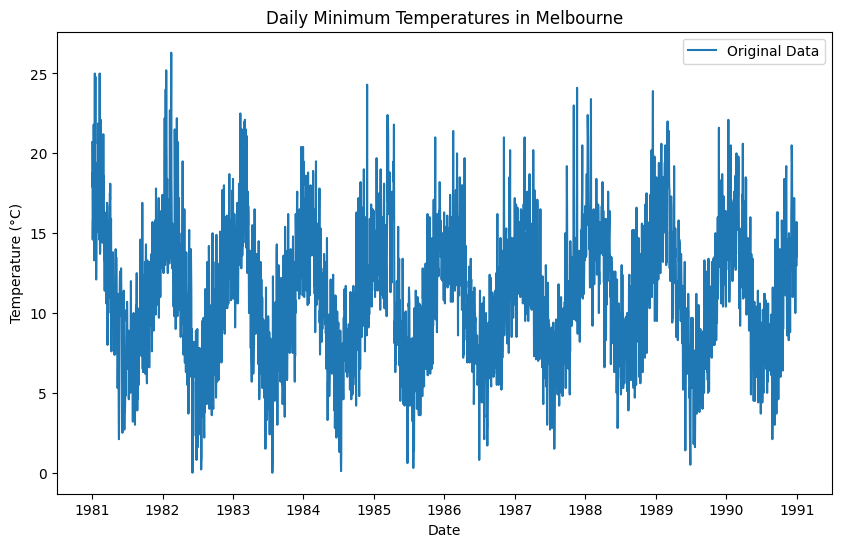

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

# Preprocessing
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Splitting into training and test sets
train_size = int(len(data_scaled) * 0.8)  # 80% for training
test_size = len(data_scaled) - train_size
train, test = data_scaled[0:train_size,:], data_scaled[train_size:len(data_scaled),:]

print("Training set size:", len(train))
print("Test set size:", len(test))

# Visualize the original and normalized data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Temp'], label='Original Data')
plt.title('Daily Minimum Temperatures in Melbourne')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


Epoch 1/100
82/82 [==============================] - 21s 149ms/step - loss: 0.0265 - val_loss: 0.0118
Epoch 2/100
82/82 [==============================] - 3s 41ms/step - loss: 0.0144 - val_loss: 0.0115
Epoch 3/100
82/82 [==============================] - 5s 57ms/step - loss: 0.0138 - val_loss: 0.0118
Epoch 4/100
82/82 [==============================] - 9s 109ms/step - loss: 0.0137 - val_loss: 0.0120
Epoch 5/100
82/82 [==============================] - 5s 65ms/step - loss: 0.0140 - val_loss: 0.0113
Epoch 6/100
82/82 [==============================] - 4s 50ms/step - loss: 0.0136 - val_loss: 0.0133
Epoch 7/100
82/82 [==============================] - 3s 41ms/step - loss: 0.0136 - val_loss: 0.0113
Epoch 8/100
82/82 [==============================] - 3s 42ms/step - loss: 0.0132 - val_loss: 0.0120
Epoch 9/100
82/82 [==============================] - 5s 60ms/step - loss: 0.0133 - val_loss: 0.0113
Epoch 10/100
82/82 [==============================] - 3s 42ms/step - loss: 0.0130 - val_loss: 0.0

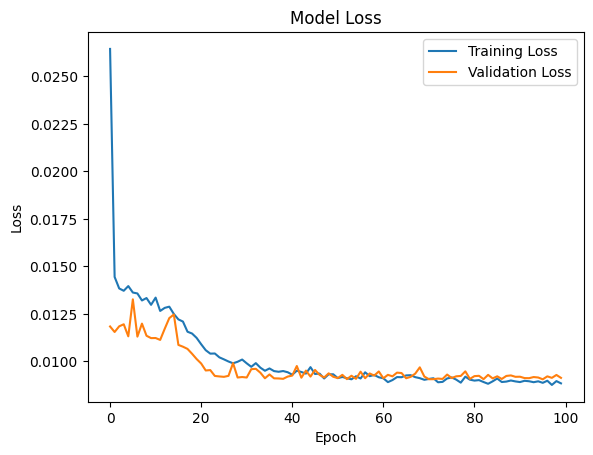

23/23 [==============================] - 0s 17ms/step
Train RMSE: 2.4291793416630316
Test RMSE: 2.1947090825681204


In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load and preprocess the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Define function to create dataset with input and output sequences
def create_dataset(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

# Set time steps and split into train and test sets
time_steps = 30
X, y = create_dataset(data_scaled, time_steps)
X_train, X_test = X[:int(X.shape[0]*0.8)], X[int(X.shape[0]*0.8):]
y_train, y_test = y[:int(y.shape[0]*0.8)], y[int(y.shape[0]*0.8):]

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Plot training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Invert predictions to original scale
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform([y_train])
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform([y_test])

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train[0], train_predictions[:,0]))
test_rmse = np.sqrt(mean_squared_error(y_test[0], test_predictions[:,0]))
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load and preprocess the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Define function to create dataset with input and output sequences
def create_dataset(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

# Set time steps and split into train and test sets
time_steps = 30
X, y = create_dataset(data_scaled, time_steps)
X_train, X_test = X[:int(X.shape[0]*0.8)], X[int(X.shape[0]*0.8):]
y_train, y_test = y[:int(y.shape[0]*0.8)], y[int(y.shape[0]*0.8):]

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Plot training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Invert predictions to original scale
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform([y_train])
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform([y_test])

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train[0], train_predictions[:,0]))
test_rmse = np.sqrt(mean_squared_error(y_test[0], test_predictions[:,0]))
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)

Epoch 1/100
82/82 [==============================] - 11s 68ms/step - loss: 0.0227 - val_loss: 0.0117
Epoch 2/100
82/82 [==============================] - 4s 53ms/step - loss: 0.0148 - val_loss: 0.0125
Epoch 3/100
82/82 [==============================] - 3s 42ms/step - loss: 0.0144 - val_loss: 0.0115
Epoch 4/100
82/82 [==============================] - 3s 41ms/step - loss: 0.0139 - val_loss: 0.0128
Epoch 5/100
82/82 [==============================] - 5s 61ms/step - loss: 0.0139 - val_loss: 0.0138
Epoch 6/100
82/82 [==============================] - 4s 49ms/step - loss: 0.0136 - val_loss: 0.0112
Epoch 7/100
82/82 [==============================] - 3s 42ms/step - loss: 0.0135 - val_loss: 0.0113
Epoch 8/100
82/82 [==============================] - 4s 50ms/step - loss: 0.0135 - val_loss: 0.0111
Epoch 9/100
82/82 [==============================] - 4s 53ms/step - loss: 0.0129 - val_loss: 0.0113
Epoch 10/100
82/82 [==============================] - 3s 42ms/step - loss: 0.0131 - val_loss: 0.011

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
epochs = 100
batch_size = 32
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=5)])

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
epochs = 100
batch_size = 32
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=5)])

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Make predictions on the test set
test_predictions = model.predict(X_test)

# Invert predictions and actual values to original scale
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform([y_test])

# Calculate evaluation metrics
mae = mean_absolute_error(y_test[0], test_predictions[:, 0])
rmse = np.sqrt(mean_squared_error(y_test[0], test_predictions[:, 0]))
print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test[0], label='Actual')
plt.plot(test_predictions[:, 0], label='Predicted')
plt.title('Test Set Predictions vs Actual Values')
plt.xlabel('Time Steps')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam

# Define a function to create the LSTM model
def create_lstm_model(learning_rate=0.001, units=50, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units, return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Wrap the Keras model in a scikit-learn estimator
estimator = KerasRegressor(build_fn=create_lstm_model)

# Define the grid of hyperparameters to search
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'units': [50, 100],
    'dropout_rate': [0.2, 0.3]
}

# Perform grid search with 3-fold cross-validation
grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_result = grid_search.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=0)

# Print the best hyperparameters and the corresponding mean squared error
print("Best Hyperparameters:", grid_result.best_params_)
print("Best Mean Squared Error:", -grid_result.best_score_)